In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import copy
np.set_printoptions(precision=2)
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
plt.style.use('./deeplearning.mplstyle')

In [97]:
import sys
sys.path.append('/path/to/lab_utils_multi.py')  # Replace '/path/to/' with the actual path to the directory containing 'lab_utils_multi.py'


In [98]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [99]:
# Cost function
def cost_fxn(x,y,w,b):
    n=x.shape[0]
    cost=0
    
    for i in range(n):
        f_wb_i=np.dot(x[i],w)+b
        cost+=(f_wb_i-y[i])**2
    cost*=1/(2*n)
    return cost

In [100]:
# computing gradient
def gradient(x,y,w,b):
#   n= no. of training examples, m=no. of features  
    n,m=x.shape
    dj_dw=np.zeros(m)
    dj_db=0
    for i in range(n):
        error=np.dot(w,x[i])+b-y[i]
        for j in range(m):
            dj_dw[j]+=error*x[i,j]
        dj_db+=error
    dj_dw*=(1/n)
    dj_db*=(1/n)
    return dj_dw,dj_db

In [101]:
# gradient descent 
def gradient_descent(x,y,w,b):
    j_history=[]
    hist={}
    num_iters=int(input("How many iterations do you want"))
    alpha=float(input("Enter a learning rate"))
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    save_interval = np.ceil(num_iters/10000)
    w=copy.deepcopy(w_init)
  
    dj_dw,dj_db=gradient(x,y,w,b)
    for i in range(num_iters):
        b=b-alpha*dj_db
        for j in range(x.shape[1]):
            w[j]=w[j]-alpha*dj_dw[j]
        j_history.append(cost_fxn(x,y,w,b))
        if i%math.ceil(num_iters/10)==0:
            print(f'for iteration {i}: cost={j_history[-1]}')
    print(f"final w={w} and final b={b}")
    if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_fxn(x, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)
    return j_history,w,b,hist

In [149]:
j_history,w,b,hist=gradient_descent(X_train,y_train,w_init,b_init)

How many iterations do you want10000
Enter a learning rate1.0e-11
for iteration 0: cost=1.5578160254660848e-12
for iteration 1000: cost=1.484397908513401e-12
for iteration 2000: cost=1.4127521549218075e-12
for iteration 3000: cost=1.342878900144876e-12
for iteration 4000: cost=1.2747780653298804e-12
for iteration 5000: cost=1.208449763820525e-12
for iteration 6000: cost=1.1438940153863831e-12
for iteration 7000: cost=1.081110644091972e-12
for iteration 8000: cost=1.0200997999554911e-12
for iteration 9000: cost=9.608613509577408e-13
final w=[  0.39  18.75 -53.36 -26.42] and final b=785.1811367994083


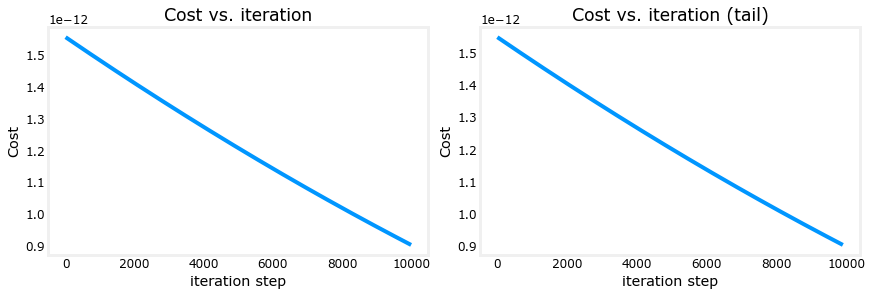

In [151]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(10 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

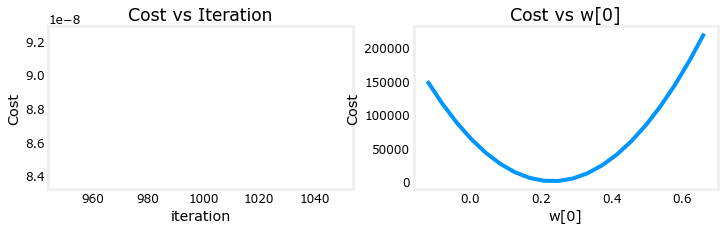

In [103]:
plot_cost_i_w(X_train,y_train,hist)

In [104]:
# def plot_descent_path(X, y, chosen_feature_index, initial_weight, initial_bias, learning_rate, num_iterations):
    """
    Plots the path of descent for a specific feature during gradient descent.
    
    Args:
    X : array_like, shape (m, n)
        Input feature matrix.
    y : array_like, shape (m, 1)
        Target values.
    chosen_feature_index : int
        Index of the feature whose path of descent you want to plot.
    initial_weight : float
        Initial value of the weight associated with the chosen feature.
    initial_bias : float
        Initial value of the bias.
    learning_rate : float
        Learning rate for gradient descent.
    num_iterations : int
        Number of iterations for gradient descent.
    """
    weight_chosen_feature = initial_weight
    bias = initial_bias
    weight_history = []

    for iteration in range(num_iterations):
        predictions = X @ weight_chosen_feature + bias
        errors = predictions - y

        weight_chosen_feature -= learning_rate * (1/len(X)) * (X[:, chosen_feature_index] * errors[:, np.newaxis]).sum()
        bias -= learning_rate * (1/len(X)) * np.sum(errors)

        weight_history.append(weight_chosen_feature)

    plt.figure()
    plt.plot(range(num_iterations), weight_history, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel(f'Weight of Chosen Feature')
    plt.title(f'Path of Descent for Feature {chosen_feature_index}')
    plt.grid(True)
    plt.show()



IndentationError: unexpected indent (4227408621.py, line 2)

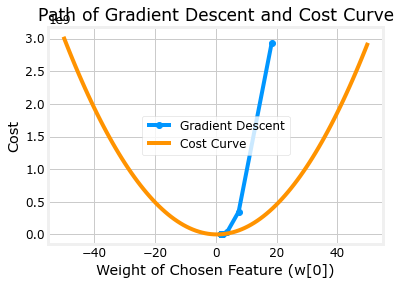

In [105]:
plot_descent_path(X_train,y_train,chosen_feature_index=0,initial_weight=np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]),initial_bias=785.1811367994083,learning_rate=1.0e-7,num_iterations=1000)

In [106]:
def plot_descent_path(X, y, chosen_feature_index, initial_weight, initial_bias, learning_rate, num_iterations):
    """
    Plots the path of gradient descent on a graph of cost versus w[chosen_feature_index],
    along with the U-shaped cost curve.
    
    Args:
    X : array_like, shape (m, n)
        Input feature matrix.
    y : array_like, shape (m, 1)
        Target values.
    chosen_feature_index : int
        Index of the feature whose path of descent you want to plot.
    initial_weight : float
        Initial value of the weight associated with the chosen feature.
    initial_bias : float
        Initial value of the bias.
    learning_rate : float
        Learning rate for gradient descent.
    num_iterations : int
        Number of iterations for gradient descent.
    """
    weight_chosen_feature = initial_weight.copy()
    bias = initial_bias
    weight_history = []
    cost_history = []

    # Calculate the U-shaped cost curve
    weight_range = np.linspace(-50, 50, 100)  # Adjust the range as needed
    cost_curve = []
    for weight_val in weight_range:
        weight_chosen_feature[chosen_feature_index] = weight_val
        predictions = X @ weight_chosen_feature + bias
        errors = predictions - y
        cost = (1 / (2 * len(X))) * np.sum(errors**2)
        cost_curve.append(cost)

    for iteration in range(num_iterations):
        predictions = X @ weight_chosen_feature + bias
        errors = predictions - y

        # Calculate the cost (mean squared error)
        cost = (1 / (2 * len(X))) * np.sum(errors**2)
        cost_history.append(cost)

        weight_chosen_feature -= learning_rate * (1/len(X)) * (X[:, chosen_feature_index] * errors[:, np.newaxis]).sum()
        bias -= learning_rate * (1/len(X)) * np.sum(errors)

        weight_history.append(weight_chosen_feature[chosen_feature_index])  # Append the weight of the chosen feature

    plt.figure()
    plt.plot(weight_history, cost_history, marker='o', label='Gradient Descent')
    plt.plot(weight_range, cost_curve, label='Cost Curve')
    plt.xlabel(f'Weight of Chosen Feature (w[{chosen_feature_index}])')
    plt.ylabel('Cost')
    plt.title('Path of Gradient Descent and Cost Curve')
    plt.legend()
    plt.grid(True)
    plt.show()




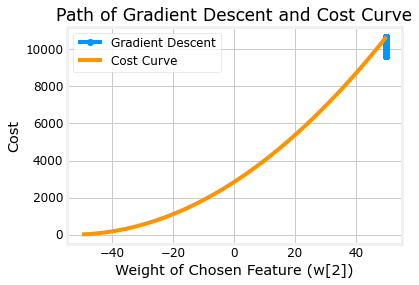

In [145]:
plot_descent_path(X_train,y_train,chosen_feature_index=2,initial_weight=np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618]),initial_bias=785.1811367994083,learning_rate=1.0e-8,num_iterations=1000)


array([2, 4, 6, 8])